# Score Analysis

# 

In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("DS1_C4_S7_Students_Scores_Data_Practice.csv")
data

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


## 

## TASK - 1 :

### Use the measures of central tendency to identify the subject in which the students have shown the best performance. While comparing the performance of three different subjects, one might just look at the average score in each subject and compare which subject has the highest average score and declare that subject as the one in which students have performed the best. Here, you need to look beyond the mean.

In [3]:
Mean = []
Median = []
Mode = []

for i in data:
    Mean.append(data.loc[:,i].mean()) 
    Median.append(data.loc[:,i].median()) 
    Mode.append(st.mode(data[i]))
    
row = ['Mean','Median','Mode']
col = ["Statistics","Python","Tableau"]

best_performance = pd.DataFrame([Mean, Median, Mode],columns=col)

best_performance.insert(0, "Measures", row, True)

best_performance

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


### Interpretation  : Students have shown best performance in "Python" subject.

# 

## TASK - 2 : 

### Measure variability to identify the subject that shows the best performance for the class.

In [4]:
Variance = []
Co_Variance = []
Mean = []

for i in data:
    V = st.variance(data.loc[:,i])
    Variance.append(V)
    M = data.loc[:,i].mean()
    Mean.append(M)
    Co_Variance.append(V/M*100)

row = ["Variance","Coefficient of Variance","Mean"]
column = ["Statistics","Python","Tableau"]

variability = pd.DataFrame([Variance,Co_Variance,Mean],columns=column)
variability.insert(0,"Measures",row,True)
variability

,Measures,Statistics,Python,Tableau
0,Variance,52.361515,18.883232,53.595556
1,Coefficient of Variance,85.993620,23.073353,78.793819
2,Mean,60.890000,81.840000,68.020000


### Interpretation : Python is the subject which shows the best performance.

## 

## TASK - 3 :

### Identify the subject in which scores are most skewed.

In [5]:
for i in data:
    LO = []
    UO = []
    sub_series = pd.Series(data[i])
    
    Q1 = sub_series.quantile(0.25)
    Q3 = sub_series.quantile(0.75)
    IQR = Q3 - Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    
    for a in data[i]:
        if a < LF:
            LO.append(a)
        if a > UF:
            UO.append(a)
            
    if i=="Statistics":
        Statistics = ["Statistics",Q1,Q3,IQR,UF,LF,[LO,UO]]
    elif i=="Python":
        Python = ["Python",Q1,Q3,IQR,UF,LF,[LO,UO]]
    else:
        Tableau = ["Tableau",Q1,Q3,IQR,UF,LF,[LO,UO]]
        
column = ["Subjects","Q1","Q3","IQR","Upper Fence","Lower Fence","Outliers"]

outlier = pd.DataFrame([Statistics,Python,Tableau],columns=column)
outlier

,Subjects,Q1,Q3,IQR,Upper Fence,Lower Fence,Outliers
0,Statistics,54.0,67.00,13.00,86.500,34.500,"[[], []]"
1,Python,78.0,86.00,8.00,98.000,66.000,"[[], []]"
2,Tableau,64.0,73.25,9.25,87.125,50.125,"[[45, 50, 50, 50, 46, 46], []]"


### Interpretation : In Tableau subject the scores are most skewed.

## 

## TASK - 4 :

### Visually present the distribution of scores obtained by the students in different subjects using box plots. Identify the subject for which the scores are most skewed.

In [6]:
statistics_score = data["Statistics"].tolist()
python_score = data["Python"].tolist()
tableau_score = data["Tableau"].tolist()

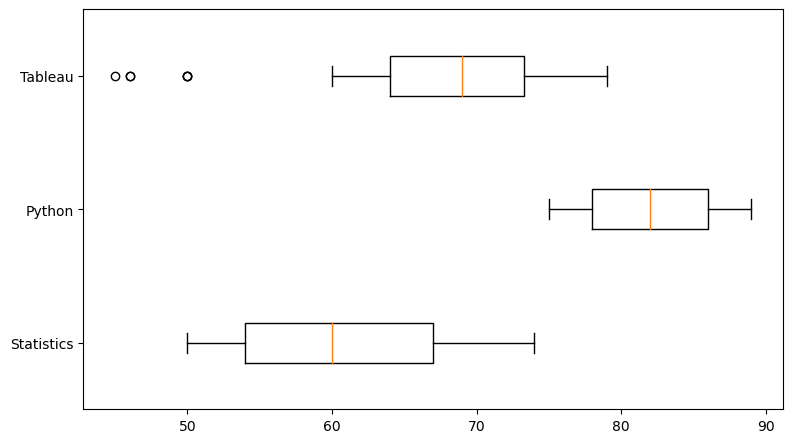

In [7]:
fig = plt.figure(figsize =(7, 4))

ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot([statistics_score,python_score,tableau_score],vert=0)

ax.set_yticklabels(["Statistics","Python","Tableau"])

plt.show()

### Interpretation : In Tableau subject scores are most skewed.

## 

## TASK - 5 :

### Present the distribution of data for each subject using normal distribution curves (bell curves). Observe and report the kurtosis analysis for every subject.

[<Axes: > <Axes: > <Axes: >]


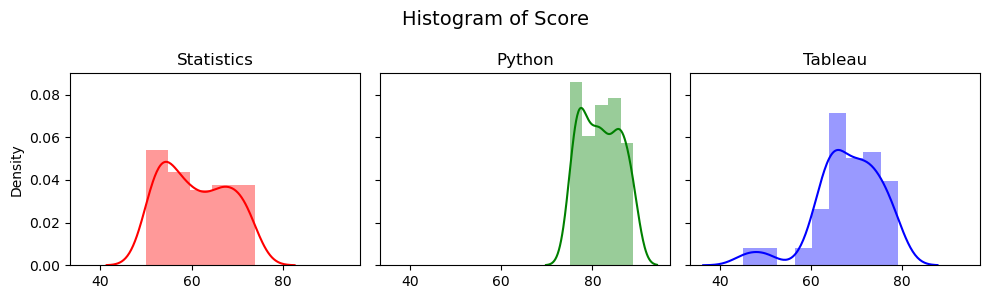

In [8]:
import warnings
warnings.filterwarnings("ignore")

fig, axis = plt.subplots(1, 3, figsize=(10,3), dpi=100, sharex=True, sharey=True)
print(axis.flatten())

colors = ["red", "green", "blue"]

cols=["Statistics", "Python", "Tableau"]

plt.suptitle("Histogram of Score", size=14)

ax.set_xlim(10, 100) 
ax.set_ylim(0.0, 8.0)

for i, (ax, col) in enumerate(zip(axis, cols)):
    x = data.loc[:,col].tolist() 
    sns.distplot(x, ax=axis[i], color=colors[i])
    ax.set_title(col)

plt.tight_layout();

plt.show()    

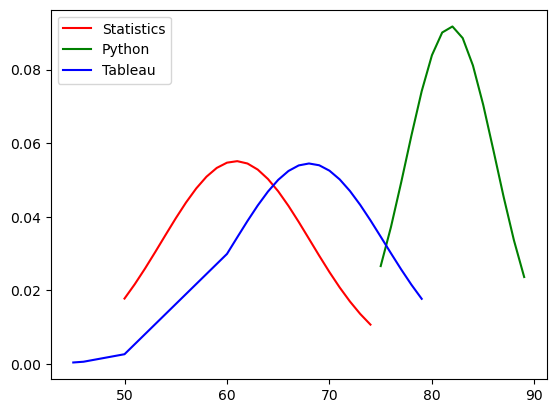

In [9]:
from scipy.stats import norm

statistics_score = sorted(statistics_score)
python_score = sorted(python_score)
tableau_score = sorted(tableau_score)

stat_mean = st.mean(statistics_score)
stat_sd = st.stdev(statistics_score)
pyt_mean = st.mean(python_score)
pyt_sd = st.stdev(python_score)
tab_mean = st.mean(tableau_score)
tab_sd = st.stdev(tableau_score)

plt.plot(statistics_score, norm.pdf(statistics_score, stat_mean, stat_sd), color='red', label='Statistics')
plt.plot(python_score, norm.pdf(python_score, pyt_mean, pyt_sd),color='green', label='Python')
plt.plot(tableau_score, norm.pdf(tableau_score, tab_mean, tab_sd), color='blue', label='Tableau')

plt.legend()

plt.show()

In [10]:
from scipy.stats import kurtosis 

print("Kurtosis of Statistics Score : ",kurtosis(statistics_score))
print("Kurtosis of Python Score : ",kurtosis(python_score))
print("Kurtosis of Tableau Score : ",kurtosis(tableau_score))

Kurtosis of Statistics Score :  -1.2890343729055107
Kurtosis of Python Score :  -1.2748529079288784
Kurtosis of Tableau Score :  1.442459054422362


### Interpretation : In the Statistics and Python scores, there are less chances of the presence of outliers in the given data. But, in Tableau scores, there is a higher chance of outliers present in the data.